In [1]:
%matplotlib inline

from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')
CMAP = plt.get_cmap("cubehelix")

In [2]:
def load_data(name):
    df = pd.read_csv(f'data/{name}.csv')
    df[f'Returns_{name}'] = df['Close'].pct_change()
    return df

ETFs = {
    'index': load_data('VTI'),
    'energy': load_data('VDE'),
    'materials': load_data('VAW'),
    'industrials': load_data('VIS'),
    'consumer_discretionary ': load_data('VCR'),
    'consumer_staples': load_data('VDC'),
    'healthcare': load_data('VHT'),
    'financials': load_data('VFH'),
    'technology': load_data('VGT'),
    'communication': load_data('VOX'),
    'realestate': load_data('VNQ'),
}
nb_instruments = len(ETFs.keys())

In [3]:
returns = (
    ETFs['index'][['Date', 'Returns_VTI']]
    .merge(ETFs['energy'][['Date', 'Returns_VDE']])
    .merge(ETFs['materials'][['Date', 'Returns_VAW']])
    .merge(ETFs['industrials'][['Date', 'Returns_VIS']])
    .merge(ETFs['consumer_discretionary '][['Date', 'Returns_VCR']])
    .merge(ETFs['consumer_staples'][['Date', 'Returns_VDC']])
    .merge(ETFs['healthcare'][['Date', 'Returns_VHT']])
    .merge(ETFs['financials'][['Date', 'Returns_VFH']])    
    .merge(ETFs['technology'][['Date', 'Returns_VGT']])
    .merge(ETFs['communication'][['Date', 'Returns_VOX']])
    .merge(ETFs['realestate'][['Date', 'Returns_VNQ']])
)
returns.head()

,Date,Returns_VDE,Returns_VAW,Returns_VIS,Returns_VCR,Returns_VDC,Returns_VHT,Returns_VFH,Returns_VGT,Returns_VOX,Returns_VNQ
0,2004-09-29,NaN,0.009551,NaN,-0.001254,-0.002375,-0.000831,0.005594,0.017604,NaN,NaN
1,2004-09-30,0.009005,0.014098,0.008333,0.012552,0.010714,-0.014966,0.002186,0.002403,0.001621,0.008024
2,2004-10-01,0.012892,0.007500,0.000000,0.012810,0.010208,0.010551,0.012887,0.032119,0.000000,0.018507
3,2004-10-04,0.000979,0.003268,0.018545,0.007548,0.001943,0.006891,0.004110,0.014863,0.000000,0.004299
4,2004-10-05,0.009194,-0.002533,-0.004552,-0.006479,-0.005043,-0.006636,-0.005848,-0.006407,0.000000,-0.000195


In [4]:
mean_daily_returns = returns.mean()
mean_daily_returns

Returns_VDE    0.000274
Returns_VAW    0.000350
Returns_VIS    0.000390
Returns_VCR    0.000444
Returns_VDC    0.000339
Returns_VHT    0.000419
Returns_VFH    0.000262
Returns_VGT    0.000561
Returns_VOX    0.000255
Returns_VNQ    0.000347
dtype: float64

In [5]:
cov_matrix = returns.cov()
cov_matrix

,Returns_VDE,Returns_VAW,Returns_VIS,Returns_VCR,Returns_VDC,Returns_VHT,Returns_VFH,Returns_VGT,Returns_VOX,Returns_VNQ
Returns_VDE,0.000304,0.000213,0.000168,0.000147,0.000087,0.000110,0.000186,0.000148,0.000138,0.000177
Returns_VAW,0.000213,0.000224,0.000173,0.000155,0.000087,0.000109,0.000193,0.000153,0.000135,0.000189
Returns_VIS,0.000168,0.000173,0.000169,0.000148,0.000083,0.000103,0.000186,0.000142,0.000126,0.000179
Returns_VCR,0.000147,0.000155,0.000148,0.000161,0.000082,0.000101,0.000181,0.000140,0.000125,0.000180
Returns_VDC,0.000087,0.000087,0.000083,0.000082,0.000070,0.000066,0.000096,0.000076,0.000075,0.000101
Returns_VHT,0.000110,0.000109,0.000103,0.000101,0.000066,0.000107,0.000120,0.000100,0.000091,0.000113
Returns_VFH,0.000186,0.000193,0.000186,0.000181,0.000096,0.000120,0.000299,0.000163,0.000155,0.000270
Returns_VGT,0.000148,0.000153,0.000142,0.000140,0.000076,0.000100,0.000163,0.000162,0.000119,0.000157
Returns_VOX,0.000138,0.000135,0.000126,0.000125,0.000075,0.000091,0.000155,0.000119,0.000149,0.000153
Returns_VNQ,0.000177,0.000189,0.000179,0.000180,0.000101,0.000113,0.000270,0.000157,0.000153,0.000362


In [6]:
def portfolio_return(mean_returns, w):
    return pd.np.sum(mean_returns * w) * 252

In [7]:
def portfolio_std_dev(cov, w):
    return pd.np.sqrt(pd.np.dot(w.T, pd.np.dot(cov, w))) * pd.np.sqrt(252)

In [8]:
def create_portfolios(num_portfolios: int):
    results = pd.np.zeros((3+nb_instruments, num_portfolios))
    for i in range(num_portfolios):
        test_weights = pd.np.random.random(nb_instruments)
        test_weights /= pd.np.sum(test_weights)  # rebalance to sum to 1

        test_r = portfolio_return(mean_daily_returns, test_weights)
        test_vol = portfolio_std_dev(cov_matrix, test_weights)

        results[0, i] = test_r
        results[1, i] = test_vol
        results[2, i] = test_r / test_vol  # Sharpe - risk free rate element excluded for simplicity

        for j in range(len(test_weights)):
            results[j+3, i] = test_weights[j]
    return pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe', *ETFs.keys()])

In [9]:
results_frame = create_portfolios(3500)
results_frame.head()

,ret,stdev,sharpe,energy,materials,industrials,consumer_discretionary,consumer_staples,healthcare,financials,technology,communication,realestate
0,0.092446,0.189422,0.488043,0.085599,0.044773,0.074105,0.131693,0.113751,0.075968,0.119816,0.126296,0.124590,0.103408
1,0.097364,0.195642,0.497667,0.077048,0.106041,0.137667,0.116553,0.026805,0.113583,0.041293,0.142996,0.083248,0.154765
2,0.102324,0.198502,0.515482,0.001005,0.258062,0.012646,0.075297,0.088850,0.059071,0.126675,0.269881,0.000484,0.108029
3,0.090095,0.192561,0.467877,0.069612,0.112545,0.100798,0.005066,0.135279,0.053687,0.136987,0.142308,0.121870,0.121848
4,0.088404,0.185642,0.476206,0.139539,0.006440,0.061134,0.140779,0.136341,0.187348,0.177129,0.028824,0.063210,0.059257


In [10]:
max_sharpe_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_portfolio = results_frame.iloc[results_frame['stdev'].idxmin()]
max_ret_portfolio = results_frame.iloc[results_frame['ret'].idxmax()]

print(f'VTI: {portfolio_return(mean_daily_returns.Returns_VTI, pd.np.array([1.0]))}')
display(HTML(max_ret_portfolio.to_frame('Best portfolio by returns').T.to_html()))
display(HTML(max_sharpe_portfolio.to_frame('Best portfolio by Sharpe').T.to_html()))
display(HTML(min_vol_portfolio.to_frame('Best portfolio by volatility').T.to_html()))

,ret,stdev,sharpe,energy,materials,industrials,consumer_discretionary,consumer_staples,healthcare,financials,technology,communication,realestate
Best portfolio by returns,0.108564,0.178375,0.60863,0.00978,0.006187,0.098369,0.229718,0.115103,0.118629,0.028173,0.274483,0.064906,0.054653


,ret,stdev,sharpe,energy,materials,industrials,consumer_discretionary,consumer_staples,healthcare,financials,technology,communication,realestate
Best portfolio by Sharpe,0.108564,0.178375,0.60863,0.00978,0.006187,0.098369,0.229718,0.115103,0.118629,0.028173,0.274483,0.064906,0.054653


,ret,stdev,sharpe,energy,materials,industrials,consumer_discretionary,consumer_staples,healthcare,financials,technology,communication,realestate
Best portfolio by volatility,0.095968,0.165514,0.579819,0.023004,0.068412,0.038923,0.082704,0.237559,0.149796,0.049027,0.170429,0.170145,0.010001


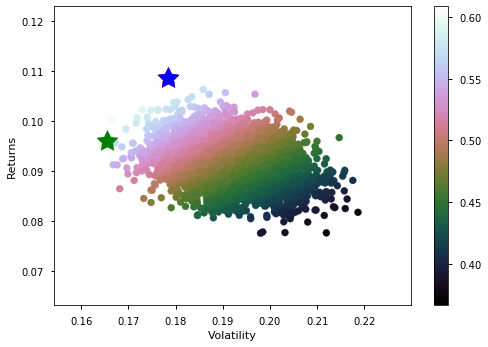

In [11]:
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap=CMAP)
plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker=(5,1,0), color='r', s=500)
plt.scatter(min_vol_portfolio[1], min_vol_portfolio[0], marker=(5,1,0), color='g', s=500)
plt.scatter(max_ret_portfolio[1], max_ret_portfolio[0], marker=(5,1,0), color='b', s=500)